In [1]:
%pip install pandas
%pip install matplotlib
%pip install imbalanced-learn
%pip install numpy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to us

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
wine_data = pd.read_csv('winequalityN.csv')
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
wine_data.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
rows_with_nan = wine_data.isna().any(axis=1)

# Display rows that contain at least one NaN value
nan_rows = wine_data[rows_with_nan]

nan_rows

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,white,NaN,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
33,white,6.2,0.120,0.34,NaN,0.045,43.0,117.0,0.99390,3.42,0.51,9.0,6
54,white,6.8,0.200,0.59,0.9,0.147,38.0,132.0,0.99300,NaN,0.38,9.1,6
86,white,7.2,NaN,0.63,11.0,0.044,55.0,156.0,0.99740,3.09,0.44,8.7,6
98,white,9.8,0.360,0.46,10.5,NaN,4.0,83.0,0.99560,2.89,0.30,10.1,4
139,white,8.1,0.280,0.39,1.9,0.029,18.0,79.0,0.99230,NaN,0.52,11.8,6
174,white,NaN,0.270,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5
224,white,6.3,0.495,0.22,1.8,0.046,31.0,140.0,0.99290,3.39,NaN,10.4,6
249,white,NaN,0.410,0.14,10.4,0.037,18.0,119.0,0.99600,3.38,0.45,10.0,5
267,white,NaN,0.580,0.07,6.9,0.043,34.0,149.0,0.99440,3.34,0.57,9.7,5


In [6]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
# Handle missing values by filling them with the mean of each column
numeric_mean = wine_data.select_dtypes(include=[float, int]).mean()

# Fill missing values in the DataFrame with the computed means
wine_data_filled = wine_data.fillna(numeric_mean)

# Display the first few rows of the updated dataframe
wine_data_filled.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
# Find rows with NaN values
rows_with_nan = wine_data_filled.isna().any(axis=1)

# Display rows that contain at least one NaN value
nan_rows = wine_data_filled[rows_with_nan]

nan_rows

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


<ipython-input-9-cce0a68ef29c>:9: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


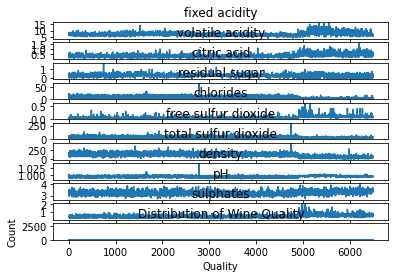

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64

In [9]:
plt.rcParams["figure.figsize"] = (18, 52)
fig, axes = plt.subplots(nrows=11, ncols=1)

for index, column in enumerate(wine_data_filled.columns):
    if column == "type" or column == "quality":
        continue
    wine_data_filled[column].plot(ax=axes[index - 1], title=column)

plt.tight_layout()

plt.rcParams["figure.figsize"] = (8, 6)
plt.hist(wine_data_filled["quality"])
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

quality_distribution = wine_data_filled["quality"].value_counts().sort_index()

quality_distribution

In [10]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE


label_encoder = LabelEncoder()
wine_data_filled['type'] = label_encoder.fit_transform(wine_data_filled['type'])

X = wine_data_filled.drop('quality', axis=1)
y = wine_data_filled['quality']

smote = SMOTE(sampling_strategy={9: 500}, k_neighbors=4, random_state=10)
X_resampled, y_resampled = smote.fit_resample(X, y)


resampled_quality_distribution = pd.Series(y_resampled).value_counts().sort_index()

resampled_quality_distribution

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9     500
Name: count, dtype: int64

In [11]:
def plot_decision_boundaries(X, y, model, title):
    # Define the grid range
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict class for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Convert the 'type' column to numerical values using Label Encoding
label_encoder = LabelEncoder()
wine_data_filled["type"] = label_encoder.fit_transform(wine_data_filled["type"])

# Split the dataset into features and target
X = wine_data_filled.drop("quality", axis=1)
y = wine_data_filled["quality"]

In [13]:
# Model initializations
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Naive Bayes": GaussianNB(),
}

In [14]:
accuracy_results = {name: [] for name in classifiers}
f1_score_results = {name: [] for name in classifiers}
strategies = ["auto", "minority", "all", "not majority", "not minority"]
smote = SMOTE(sampling_strategy="auto", random_state=10, k_neighbors=4)
enn = EditedNearestNeighbours(sampling_strategy="auto", n_neighbors=4)

for strategy in strategies:
    # Create SMOTEENN instance with dynamic n_neighbors
    smote_enn = SMOTEENN(sampling_strategy=strategy, random_state=10, smote=smote, enn=enn)
    X_resampled, y_resampled = smote_enn.fit_resample(X, y)

    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.3, random_state=10
    )

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        accuracy_results[name].append(accuracy)
        f1 = f1_score(y_test, predictions, average="weighted")
        f1_score_results[name].append(f1)
        print(f"F1 Score for {name}: {f1:.4f}")
        print(f"Accuracy for {name}: {accuracy:.4f}")
        print(
            f"Classification Report for {name}:\n",
            classification_report(y_test, predictions),
        )
        print("-" * 50)

F1 Score for Decision Tree: 0.9207
Accuracy for Decision Tree: 0.9215
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           3       0.96      0.98      0.97       873
           4       0.89      0.91      0.90       683
           5       0.79      0.73      0.75       216
           6       0.63      0.60      0.61        70
           7       0.88      0.83      0.85       507
           8       0.92      0.93      0.93       732
           9       0.99      1.00      1.00       803

    accuracy                           0.92      3884
   macro avg       0.86      0.85      0.86      3884
weighted avg       0.92      0.92      0.92      3884

--------------------------------------------------
F1 Score for SVM: 0.4238
Accuracy for SVM: 0.4961
Classification Report for SVM:
               precision    recall  f1-score   support

           3       0.52      0.65      0.58       873
           4       0.50      0.52      0.51      

/home/studentx/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/studentx/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/studentx/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/studentx/.local/lib/python3.

F1 Score for Logistic Regression: 0.5627
Accuracy for Logistic Regression: 0.5947
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           3       0.53      0.61      0.57       873
           4       0.57      0.60      0.59       683
           5       0.24      0.06      0.10       216
           6       0.69      0.13      0.22        70
           7       0.53      0.20      0.29       507
           8       0.51      0.60      0.55       732
           9       0.78      1.00      0.87       803

    accuracy                           0.59      3884
   macro avg       0.55      0.46      0.46      3884
weighted avg       0.57      0.59      0.56      3884

--------------------------------------------------
F1 Score for Naive Bayes: 0.4753
Accuracy for Naive Bayes: 0.5033
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           3       0.76      0.44      0.56       873
       

/home/studentx/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/studentx/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/studentx/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/studentx/.local/lib/python3.

F1 Score for Logistic Regression: 0.5627
Accuracy for Logistic Regression: 0.5947
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           3       0.53      0.61      0.57       873
           4       0.57      0.60      0.59       683
           5       0.24      0.06      0.10       216
           6       0.69      0.13      0.22        70
           7       0.53      0.20      0.29       507
           8       0.51      0.60      0.55       732
           9       0.78      1.00      0.87       803

    accuracy                           0.59      3884
   macro avg       0.55      0.46      0.46      3884
weighted avg       0.57      0.59      0.56      3884

--------------------------------------------------
F1 Score for Naive Bayes: 0.4753
Accuracy for Naive Bayes: 0.5033
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           3       0.76      0.44      0.56       873
       

/home/studentx/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/studentx/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/studentx/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/studentx/.local/lib/python3.

F1 Score for Logistic Regression: 0.5627
Accuracy for Logistic Regression: 0.5947
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           3       0.53      0.61      0.57       873
           4       0.57      0.60      0.59       683
           5       0.24      0.06      0.10       216
           6       0.69      0.13      0.22        70
           7       0.53      0.20      0.29       507
           8       0.51      0.60      0.55       732
           9       0.78      1.00      0.87       803

    accuracy                           0.59      3884
   macro avg       0.55      0.46      0.46      3884
weighted avg       0.57      0.59      0.56      3884

--------------------------------------------------
F1 Score for Naive Bayes: 0.4753
Accuracy for Naive Bayes: 0.5033
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           3       0.76      0.44      0.56       873
       

/home/studentx/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/studentx/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/studentx/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/studentx/.local/lib/python3.

F1 Score for Logistic Regression: 0.5627
Accuracy for Logistic Regression: 0.5947
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           3       0.53      0.61      0.57       873
           4       0.57      0.60      0.59       683
           5       0.24      0.06      0.10       216
           6       0.69      0.13      0.22        70
           7       0.53      0.20      0.29       507
           8       0.51      0.60      0.55       732
           9       0.78      1.00      0.87       803

    accuracy                           0.59      3884
   macro avg       0.55      0.46      0.46      3884
weighted avg       0.57      0.59      0.56      3884

--------------------------------------------------
F1 Score for Naive Bayes: 0.4753
Accuracy for Naive Bayes: 0.5033
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           3       0.76      0.44      0.56       873
       

/home/studentx/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/studentx/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/studentx/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score for Logistic Regression: 0.5627
Accuracy for Logistic Regression: 0.5947
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           3       0.53      0.61      0.57       873
           4       0.57      0.60      0.59       683
           5       0.24      0.06      0.10       216
           6       0.69      0.13      0.22        70
           7       0.53      0.20      0.29       507
           8       0.51      0.60      0.55       732
           9       0.78      1.00      0.87       803

    accuracy                           0.59      3884
   macro avg       0.55      0.46      0.46      3884
weighted avg       0.57      0.59      0.56      3884

--------------------------------------------------
F1 Score for Naive Bayes: 0.4753
Accuracy for Naive Bayes: 0.5033
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           3       0.76      0.44      0.56       873
       

/home/studentx/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


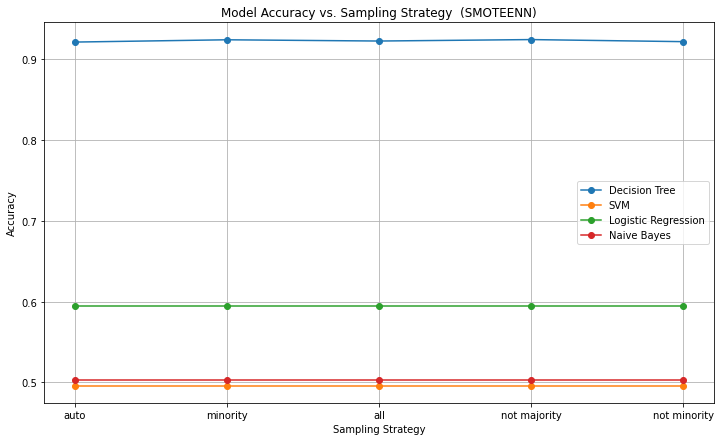

In [15]:
# Plotting the results for each undersampler
plt.figure(figsize=(12, 7))
for name, accuracies in accuracy_results.items():
    plt.plot(strategies, accuracies, label=name, marker="o")

# plt.title(f"Model Accuracy vs. Imbalance Level ({sampler_name})")
plt.title(f"Model Accuracy vs. Sampling Strategy  (SMOTEENN)")
plt.xlabel("Sampling Strategy")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

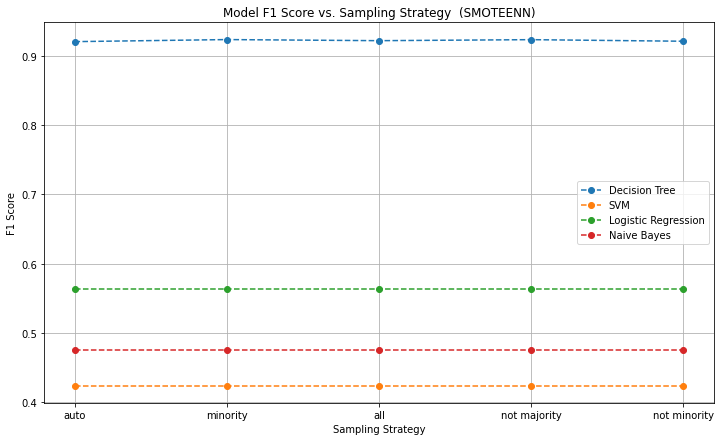

In [16]:
# Plotting the results for each undersampler
plt.figure(figsize=(12, 7))
for name, f1_scores in f1_score_results.items():
    plt.plot(strategies, f1_scores, label=name, marker="o", linestyle="--")

# plt.title(f"Model Accuracy vs. Imbalance Level ({sampler_name})")
plt.title(f"Model F1 Score vs. Sampling Strategy  (SMOTEENN)")
plt.xlabel("Sampling Strategy")
plt.ylabel("F1 Score")
plt.legend()
plt.grid(True)
plt.show()